In [118]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
comp_mat = pd.read_csv("/Users/seunghoonyang/Documents/python/data_tinkering/comp_mat.csv", encoding='cp949')

In [3]:
comp_mat

,국가및권역별,전산업·소재부품장비산업별,항목,단위,2012.01 월,2012.02 월,2012.03 월,2012.04 월,2012.05 월,2012.06 월,...,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,Unnamed: 127
0,전체,전산업,수출액[$],$,41200357940,46316183638,47329816570,46094754124,46872357095,47162604994,...,55461518159,53165103786,55913862375,55660372637,60330542263,60734116670,55426828234,53912245326,63477507377,NaN
1,전체,전산업,수입액[$],$,43517290617,45099984295,45053405629,43957175504,44480338601,41993629221,...,53676255790,51581092948,51636341037,53847824499,57357549236,61159670671,60157241862,53081675541,63526224200,NaN
2,전체,소재·부품·장비산업,수출액[$],$,20661484408,23110789066,23900819389,23146211627,23959315734,23615942194,...,31198157430,30605739738,31691376996,31062376186,32192350328,34853853720,30339921697,28572097148,33800290175,NaN
3,전체,소재·부품·장비산업,수입액[$],$,15533923734,15419227218,16478646041,16117703411,16051035988,15197962116,...,21481954574,20258182624,20401209579,20588034337,22097379320,24192142130,20831598855,19538836803,22627381836,NaN
4,아시아,전산업,수출액[$],$,23745190192,25861715382,27042203441,24836676895,26371848084,26499484039,...,32557595420,32656169943,34575318472,33827993857,36346715452,37023197693,32740351186,31999826054,38000669174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,OPEC,소재·부품·장비산업,수입액[$],$,131451296,135463208,133006407,148958935,141613872,140681269,...,106118498,106297540,75319247,124816041,127531702,132080119,121033121,101992826,131700966,NaN
208,개발도상국,전산업,수출액[$],$,23372531009,25224378253,25622260234,25382682168,26428653002,26139733657,...,30093364262,29770958525,31114711590,31468090539,35173406140,33982677337,31041114467,30149669988,34598098859,NaN
209,개발도상국,전산업,수입액[$],$,25348930223,26032530625,25402221334,25290491650,25655387951,24253056932,...,28129588157,28168348291,27476087349,29755821485,32368107687,34241380213,34294663422,29061351406,34483086328,NaN
210,개발도상국,소재·부품·장비산업,수출액[$],$,13123083766,14360433772,14953157258,14772000836,15323325416,15294669757,...,19593454307,19411118551,20272353300,20019135356,20741627019,22011055412,18288735407,17422204435,20053758594,NaN


In [6]:
comp_mat.drop('단위', axis=1, inplace=True)

In [18]:
trans = comp_mat.set_index(['국가및권역별', '전산업·소재부품장비산업별', '항목']).T

In [22]:
trans.index.name = 'date'

In [32]:
transform = lambda x: pd.to_datetime(x[0:7], format = "%Y.%m")

In [33]:
trans.index.map(transform)

ValueError: time data Unnamed doesn't match format specified

In [41]:
trans2 = trans.iloc[:123, ]

In [44]:
trans2.index = trans2.index.map(transform)

In [52]:
trans3 = trans2.stack().stack().stack()

In [55]:
trans3.index

MultiIndex([('2012-01-01', '수입액[$]', '소재·부품·장비산업',    'ASEAN'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',       'EU'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     'LAIA'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     'OECD'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     'OPEC'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',    '개발도상국'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     '기타지역'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업', '남아프리카공화국'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     '네덜란드'),
            ('2012-01-01', '수입액[$]', '소재·부품·장비산업',     '노르웨이'),
            ...
            ('2022-03-01', '수출액[$]',        '전산업',       '중동'),
            ('2022-03-01', '수출액[$]',        '전산업',    '체코공화국'),
            ('2022-03-01', '수출액[$]',        '전산업',       '칠레'),
            ('2022-03-01', '수출액[$]',        '전산업',      '캐나다'),
            ('2022-03-01', '수출액[$]',        '전산업',       '태국'),
            ('2022-03-01

In [58]:
trans4 = trans3.reset_index(['항목', '전산업·소재부품장비산업별', '국가및권역별'])

In [60]:
trans4

,항목,전산업·소재부품장비산업별,국가및권역별,0
date,,,,
2012-01-01,수입액[$],소재·부품·장비산업,ASEAN,1.353923e+09
2012-01-01,수입액[$],소재·부품·장비산업,EU,2.201275e+09
2012-01-01,수입액[$],소재·부품·장비산업,LAIA,2.524883e+08
2012-01-01,수입액[$],소재·부품·장비산업,OECD,8.598789e+09
2012-01-01,수입액[$],소재·부품·장비산업,OPEC,1.314513e+08
...,...,...,...,...
2022-03-01,수출액[$],전산업,폴란드,6.519501e+08
2022-03-01,수출액[$],전산업,프랑스,4.085413e+08
2022-03-01,수출액[$],전산업,핀란드,2.170053e+07


In [66]:
trans4

,항목,전산업·소재부품장비산업별,국가및권역별,0
date,,,,
2012-01-01,수입액[$],소재·부품·장비산업,ASEAN,1.353923e+09
2012-01-01,수입액[$],소재·부품·장비산업,EU,2.201275e+09
2012-01-01,수입액[$],소재·부품·장비산업,LAIA,2.524883e+08
2012-01-01,수입액[$],소재·부품·장비산업,OECD,8.598789e+09
2012-01-01,수입액[$],소재·부품·장비산업,OPEC,1.314513e+08
...,...,...,...,...
2022-03-01,수출액[$],전산업,폴란드,6.519501e+08
2022-03-01,수출액[$],전산업,프랑스,4.085413e+08
2022-03-01,수출액[$],전산업,핀란드,2.170053e+07


In [67]:
trans4.index

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=26076, freq=None)

In [68]:
trans4.columns

Index(['항목', '전산업·소재부품장비산업별', '국가및권역별', 0], dtype='object')

In [71]:
trans4.columns = ['항목', '전산업·소재부품장비산업별', '국가및권역별', '금액']

In [72]:
trans4

,항목,전산업·소재부품장비산업별,국가및권역별,금액
date,,,,
2012-01-01,수입액[$],소재·부품·장비산업,ASEAN,1.353923e+09
2012-01-01,수입액[$],소재·부품·장비산업,EU,2.201275e+09
2012-01-01,수입액[$],소재·부품·장비산업,LAIA,2.524883e+08
2012-01-01,수입액[$],소재·부품·장비산업,OECD,8.598789e+09
2012-01-01,수입액[$],소재·부품·장비산업,OPEC,1.314513e+08
...,...,...,...,...
2022-03-01,수출액[$],전산업,폴란드,6.519501e+08
2022-03-01,수출액[$],전산업,프랑스,4.085413e+08
2022-03-01,수출액[$],전산업,핀란드,2.170053e+07


KeyboardInterrupt: 

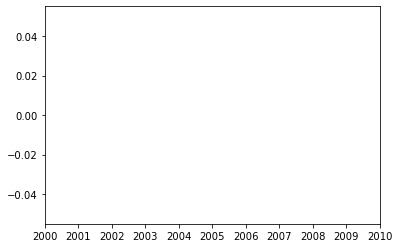

In [77]:
sns.lineplot(data = trans4, x = 'date', y = '금액', hue = '국가및권역별', style = '항목')

In [79]:
trans4.국가및권역별.unique()

array(['ASEAN', 'EU', 'LAIA', 'OECD', 'OPEC', '개발도상국', '기타지역', '남아프리카공화국',
       '네덜란드', '노르웨이', '대만', '독일', '러시아', '루마니아', '말레이지아', '멕시코', '미국',
       '베트남', '벨기에', '북미', '불가리아', '브라질', '사우디아라비아', '선진국', '스웨덴', '스위스',
       '스페인', '싱가포르', '아랍에미리트', '아르헨티나', '아시아', '아프리카', '영국', '오세아니아',
       '오스트리아', '유럽', '이탈리아', '인도', '인도네시아', '일본', '전체', '중국', '중남미',
       '중동', '체코공화국', '칠레', '캐나다', '태국', '폴란드', '프랑스', '핀란드', '필리핀', '홍콩'],
      dtype=object)

In [80]:
trans4[trans4.국가및권역별 == "중국"]

,항목,전산업·소재부품장비산업별,국가및권역별,금액
date,,,,
2012-01-01,수입액[$],소재·부품·장비산업,중국,3.800346e+09
2012-01-01,수입액[$],전산업,중국,6.834749e+09
2012-01-01,수출액[$],소재·부품·장비산업,중국,7.048858e+09
2012-01-01,수출액[$],전산업,중국,9.793924e+09
2012-02-01,수입액[$],소재·부품·장비산업,중국,3.526255e+09
...,...,...,...,...
2022-02-01,수출액[$],전산업,중국,1.300868e+10
2022-03-01,수입액[$],소재·부품·장비산업,중국,6.145909e+09
2022-03-01,수입액[$],전산업,중국,1.180821e+10


In [90]:
trans4.index

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=26076, freq=None)

In [91]:
trans5 = trans4[trans4.국가및권역별 == "중국"]

/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

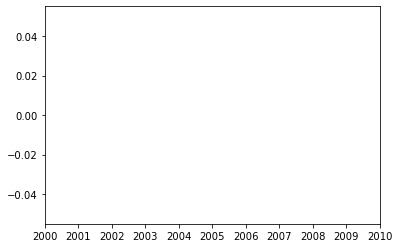

In [92]:
sns.lineplot(data = trans5, x = 'date', y = '금액')

In [105]:
trans4.reset_index()

,date,항목,전산업·소재부품장비산업별,국가및권역별,금액
0,2012-01-01,수입액[$],소재·부품·장비산업,ASEAN,1.353923e+09
1,2012-01-01,수입액[$],소재·부품·장비산업,EU,2.201275e+09
2,2012-01-01,수입액[$],소재·부품·장비산업,LAIA,2.524883e+08
3,2012-01-01,수입액[$],소재·부품·장비산업,OECD,8.598789e+09
4,2012-01-01,수입액[$],소재·부품·장비산업,OPEC,1.314513e+08
...,...,...,...,...,...
26071,2022-03-01,수출액[$],전산업,폴란드,6.519501e+08
26072,2022-03-01,수출액[$],전산업,프랑스,4.085413e+08
26073,2022-03-01,수출액[$],전산업,핀란드,2.170053e+07
26074,2022-03-01,수출액[$],전산업,필리핀,1.138676e+09


In [94]:
trans4.columns

Index(['항목', '전산업·소재부품장비산업별', '국가및권역별', '금액'], dtype='object')

In [98]:
trans4.index.duplicated()

array([False,  True,  True, ...,  True,  True,  True])

In [101]:
trans4.reindex(['date', '항목'])

/var/folders/jf/gt_0n5l11fb60xg7lyjrbvbw0000gn/T/ipykernel_73897/190435666.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  trans4.reindex(['date', '항목'])


ValueError: cannot reindex on an axis with duplicate labels

In [102]:
trans4.columns.is_unique

True

In [104]:
trans4.index.duplicated()

array([False,  True,  True, ...,  True,  True,  True])

In [106]:
trans5 = trans4.reset_index()

In [111]:
trans5

,date,항목,전산업·소재부품장비산업별,국가및권역별,금액
0,2012-01-01,수입액[$],소재·부품·장비산업,ASEAN,1.353923e+09
1,2012-01-01,수입액[$],소재·부품·장비산업,EU,2.201275e+09
2,2012-01-01,수입액[$],소재·부품·장비산업,LAIA,2.524883e+08
3,2012-01-01,수입액[$],소재·부품·장비산업,OECD,8.598789e+09
4,2012-01-01,수입액[$],소재·부품·장비산업,OPEC,1.314513e+08
...,...,...,...,...,...
26071,2022-03-01,수출액[$],전산업,폴란드,6.519501e+08
26072,2022-03-01,수출액[$],전산업,프랑스,4.085413e+08
26073,2022-03-01,수출액[$],전산업,핀란드,2.170053e+07
26074,2022-03-01,수출액[$],전산업,필리핀,1.138676e+09


In [112]:
sns.lineplot(trans5[trans5.국가및권역별 in ['중국', '미국', '일본']], x = 'date', y = '금액', hue = '항목')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

KeyboardInterrupt: 

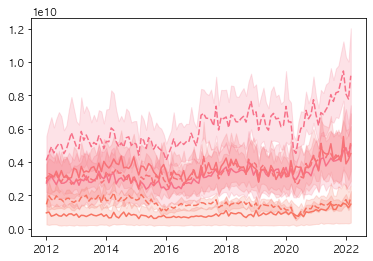

In [123]:
sns.lineplot(data = trans5, x = 'date', y = '금액', hue = '국가및권역별', style = '항목')